In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()


········


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# get the data

In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''select 
i.store_id as store, 
r.staff_id as staff, 
f.length as length, 
f.rating as rating,
f.rental_rate as rental_rate,
f.title as film, 
c.name as category,
date_format(convert(r.rental_date,date), '%%M') as date,
case 
	when r.rental_date between "2005-06-01" and "2005-06-30" then -count(f.film_id) 
    when r.rental_date between "2005-07-01" and "2005-07-31" then count(f.film_id) 
    Else ""
end as Total
from rental as r
join inventory as i
on i.inventory_id = r.inventory_id
join film as f
on f.film_id = i.inventory_id
join film_category as fc
on fc.film_id = i.film_id
join category as c
on c.category_id = fc.category_id
where r.rental_date between "2005-06-01" and "2005-07-31"
group by date, film
order by film asc;'''

data = pd.read_sql_query(query, engine)
data.head(20)

,store,staff,length,rating,rental_rate,film,category,date,Total
0,1,2,86,PG,0.99,ACADEMY DINOSAUR,Documentary,July,1
1,1,2,48,G,4.99,ACE GOLDFINGER,Documentary,June,-1
2,1,1,48,G,4.99,ACE GOLDFINGER,Documentary,July,2
3,2,1,169,PG,2.99,AGENT TRUMAN,Documentary,June,-1
4,2,2,169,PG,2.99,AGENT TRUMAN,Documentary,July,2
5,2,2,62,PG-13,4.99,AIRPLANE SIERRA,Documentary,June,-1
6,2,1,62,PG-13,4.99,AIRPLANE SIERRA,Documentary,July,2
7,2,1,63,NC-17,4.99,ALADDIN CALENDAR,Horror,July,2
8,2,2,136,PG,0.99,ALASKA PHANTOM,Documentary,July,1
9,2,1,94,NC-17,0.99,ALICE FANTASIA,Documentary,June,-1


In [4]:
data.dtypes

store            int64
staff            int64
length           int64
rating          object
rental_rate    float64
film            object
category        object
date            object
Total           object
dtype: object

In [5]:
data['Total'] = pd.to_numeric(data['Total'])
data.dtypes

store            int64
staff            int64
length           int64
rating          object
rental_rate    float64
film            object
category        object
date            object
Total            int64
dtype: object

In [6]:
# data.pivot_table(index = ['film'], values = ['Total'], aggfunc = ['mean'])
# data.pivot_table(index =['film'], values=['store', 'staff', 'length', 'rating', 'rental_rate', 'film', 'category', 'date', 'Total'])
# pd.crosstab(data['film'],data['Total'])
# data.groupby(['film']).agg({'Total':sum})
data2 = data.pivot_table(index =['film'], values=['store', 'staff', 'length', 'rental_rate', 'Total'], aggfunc = {'store' :'mean', 'staff':'mean', 'length':'mean', 'rental_rate':'mean','Total': 'sum'})
data2.head(20)

,Total,length,rental_rate,staff,store
film,,,,,
ACADEMY DINOSAUR,1,86,0.99,2.0,1
ACE GOLDFINGER,1,48,4.99,1.5,1
AGENT TRUMAN,1,169,2.99,1.5,2
AIRPLANE SIERRA,1,62,4.99,1.5,2
ALADDIN CALENDAR,2,63,4.99,1.0,2
ALASKA PHANTOM,1,136,0.99,2.0,2
ALICE FANTASIA,0,94,0.99,1.5,2
ALIEN CENTER,2,46,2.99,2.0,2
ALLEY EVOLUTION,2,180,2.99,1.0,1


In [7]:
### Total is the difference between July and June of monthly rentals : 0 means same rentals and 2 means 2 more rentals in July than June

In [8]:
# Analyze extracted features and transform them. You may need to encode some categorical variables or scale numerical variables.

In [9]:
X = data2.drop('Total',axis = 1)
y = data2['Total']

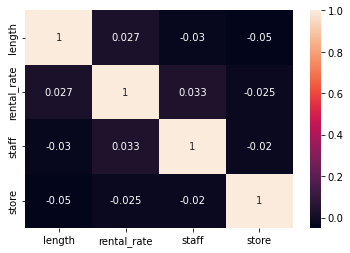

In [10]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
# all features are numeric, so no need to split into _num and _cat. Transformer = scaler
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
x_train_norm = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
x_test_norm = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
x_train_norm.head()

,length,rental_rate,staff,store
film,,,,
GATHERING CALENDAR,1.519847,-1.227101,0.014034,-0.973329
GLADIATOR WESTWARD,1.445165,1.208814,-1.154308,-0.973329
SIDE ARK,-1.567019,-1.227101,1.182376,1.027402
GUNFIGHTER MUSSOLINI,0.300037,-0.009144,-1.154308,-0.973329
MALKOVICH PET,1.096648,-0.009144,-1.154308,-0.973329


In [15]:
from sklearn.linear_model import LogisticRegression

lm = LinearRegression()
lm.fit(x_train_norm, y_train)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
y_pred_train = lm.predict(x_train_norm)
y_pred_test = lm.predict(x_test_norm)
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)


print("R2 score of trained dataset is", r2_train)
print("R2 score of test dataset is", r2_test)
print("Mean squared error of trained dataset is", mse_train)
print("Mean squared error of test dataset is", mse_test)

print(lm.intercept_)
print(lm.coef_)

### Which columns are more relevant? 

column_relevance = list(zip(np.abs(lm.coef_), x_train_norm.columns, lm.coef_))
column_relevance.sort(reverse=True)
column_relevance = [(item[1],item[-1],item[0]) for item in column_relevance]
column_relevance
#sorted_x = sorted(column_relevance.items(), key=lambda x: x[1])
#sorted_x

R2 score of trained dataset is -134.15481278051993
R2 score of test dataset is -141.26706372409237
Mean squared error of trained dataset is 0.4003331530616418
Mean squared error of test dataset is 0.43979695358919024
0.9099099099099099
[-0.03304564  0.01056009 -0.00739959 -0.04355353]


[('store', -0.04355352733258127, 0.04355352733258127),
 ('length', -0.033045636512687375, 0.033045636512687375),
 ('rental_rate', 0.01056009493295617, 0.01056009493295617),
 ('staff', -0.007399589302504429, 0.007399589302504429)]

In [14]:
### There is no correlation between the numerical features and the july rentals prediction